In [ ]:
from Tasks.tests import generate_test

tasks = generate_test()


In [ ]:
from Tasks.GeneticAlgorithm.Permutations_generator_heuristics import generate_permutation

permutation1 = generate_permutation(tasks, False)
permutation2 = generate_permutation(tasks, False)


In [ ]:
print(permutation)

In [1]:
import random
from PMOntologic.PMO import Project
from PMOntologic.Resource import Resource
from Simulation.Simulator import Simulator
from Simulation.Environment import WorkCenter
from Simulation.PMAgent import PMAgent, PMperception
from Simulation.WorkerAgent import WorkerAgent
from Tasks.GeneticAlgorithm.Population import Population
from Tasks.GeneticAlgorithm.Tasks_combination import optimization_function
from Tasks.task import Task

agents = [
    WorkerAgent('trabajador_1', problem_solving=10, friendship=1),
    WorkerAgent('trabajador_2', problem_solving=20, friendship=1),
    WorkerAgent('trabajador_3', problem_solving=50, friendship=1)
]


# Instancias de recursos para un proyecto de software

# Desarrolladores
developers = Resource(id="Developers", total=10)
# Testers
testers = Resource(id="Testers", total=5)
# Servidores (para desarrollo y producción)
servers = Resource(id="Servers", total=8)
# Licencias de software (herramientas de desarrollo, testing, etc.)
licenses = Resource(id="Licenses", total=30)
# Equipos de trabajo (laptops, estaciones de trabajo)
workstations = Resource(id="Workstations", total=15)
# Base de datos (servidores de base de datos)
databases = Resource(id="Databases", total=3)
# Almacenamiento en la nube
cloud_storage = Resource(id="CloudStorage", total=50)
# Red (ancho de banda, routers, etc.)
network = Resource(id="Network", total=5)
# Soporte técnico (servicios de soporte y mantenimiento)
technical_support = Resource(id="TechnicalSupport", total=2)
# Herramientas de gestión de proyectos (licencias de herramientas como Jira, Trello)
project_management_tools = Resource(id="ProjectManagementTools", total=20)

resources = [developers, project_management_tools, testers, servers, licenses, workstations, databases, cloud_storage, network, technical_support]

# Crear tareas

task1 = Task(id=1, start=0, deadline=20, priority=5, duration=10, reward=80, difficulty=50, problems_probability=0.1)
task1.resources = [Resource(id="Developers", total=1), Resource(id="Workstations", total=8)]  # Requiere 10 developers y 15 workstations

task2 = Task(id=2, start=0, deadline=30, priority=3, duration=20, reward=60, difficulty=10, problems_probability=0.05)
task2.resources = [Resource(id="Testers", total=1),  Resource(id="Servers", total=1)]  # Requiere 5 testers y 8 servers

task3 = Task(id=3, start=0, deadline=15, priority=4, duration=10, reward=90, difficulty=60, problems_probability=0.15)
task3.resources = [Resource(id="Developers", total=2), Resource(id="Databases", total=1), Resource(id="Licenses", total=10)]  # Requiere 10 developers, 3 databases y 30 licenses

task4 = Task(id=4, start=10, deadline=50, priority=4, duration=15, reward=70, difficulty=55, problems_probability=0.2)
task4.resources = [Resource(id="CloudStorage", total=30), Resource(id="TechnicalSupport", total=1)]  # Requiere 50 unidades de cloud storage y 2 de soporte técnico
task4.dependencies = [task1]  # Depende de task1

task5 = Task(id=5, start=20, deadline=50, priority=2, duration=10, reward=50, difficulty=30, problems_probability=0.05)
task5.resources = [Resource(id="ProjectManagementTools", total=15), Resource(id="Licenses", total=10)]  # Requiere 20 unidades de herramientas de gestión y 30 licencias
task5.dependencies = [task2]  # Depende de task2

task6 = Task(id=6, start=10, deadline=70, priority=1, duration=20, reward=40, difficulty=20, problems_probability=0.1)
task6.resources = [Resource(id="Network", total=1), Resource(id="Databases", total=1)]  # Requiere 5 unidades de network y 3 databases
task6.dependencies = [task4]  # Depende de task4

task7 = Task(id=7, start=30, deadline=80, priority=3, duration=40, reward=60, difficulty=50, problems_probability=0.1)
task7.resources = [Resource(id="Developers", total=2),  Resource(id="Servers", total=2), Resource(id="Licenses", total=5)]  # Requiere 10 developers, 8 servers y 30 licencias
task7.dependencies = [task3, task5]  # Depende de task3 y task5

task8 = Task(id=8, start=20, deadline=100, priority=2, duration=10, reward=70, difficulty=40, problems_probability=0.05)
task8.resources = [Resource(id="CloudStorage", total=10), Resource(id="Testers", total=4)]  # Requiere 50 unidades de cloud storage y 5 testers
task8.dependencies = [task6]  # Depende de task6

task9 = Task(id=9, start=40, deadline=110, priority=5, duration=20, reward=90, difficulty=70, problems_probability=0.25)
task9.resources = [Resource(id="Developers", total=1), Resource(id="TechnicalSupport", total=1)]  # Requiere 10 developers y 2 unidades de soporte técnico
task9.dependencies = [task7]  # Depende de task7

task10 = Task(id=10, start=40, deadline=110, priority=4, duration=30, reward=85, difficulty=60, problems_probability=0.2)
task10.resources = [Resource(id="Workstations", total=2),  Resource(id="Servers", total=2), Resource(id="Databases", total=1)]  # Requiere 15 workstations, 8 servers y 3 databases
task10.dependencies = [task8, task9]  # Depende de task8 y task9


tasks = [task1, task2, task3, task4, task5, task6, task7, task8, task9, task10]


project = Project(objective='number_of_tasks',tasks=tasks, resources=resources)

pm = PMAgent(min_motivation_team=20, initial_perception=PMperception(actual_time=0, team_motivation=80), project=project)
pm.know_workers([(agent.id,agent.problem_solving) for agent in agents])

simulator = Simulator(WorkCenter)
simulator.StartSimulation(100,agents,pm,project)

Tipo de hitos generado: conservador

 PMperception:
  Actual Time: 0
  Reports: []
  Workers' State: [('trabajador_1', 0), ('trabajador_2', 0), ('trabajador_3', 0)]
  Resources: [('Developers', 10), ('ProjectManagementTools', 20), ('Testers', 5), ('Servers', 8), ('Licenses', 30), ('Workstations', 15), ('Databases', 3), ('CloudStorage', 50), ('Network', 5), ('TechnicalSupport', 2)]
  Problems: []
  Solved Problems: []
  Team Motivation: 100
  Risks: []
  Opportunities: []
Intenciones generadas por el Project Manager :
----------------------
assign

 PMAction:
  Assignments: [('trabajador_3', 3), ('trabajador_1', 2), ('trabajador_3', 1), ('trabajador_2', 5), ('trabajador_3', 4), ('trabajador_2', 6), ('trabajador_2', 8), ('trabajador_1', 7), ('trabajador_1', 9)]
  Ask Reports: []
  Planning: None
  Reassign: []
  Work On: None
  Cooperations: []
  Evaluate Performance: False
  Motivate: []
  Priority: None
  Optimize: []
  Take Chance: None
trabajador_1

 WorkerPerception:
Task available:

(<Simulation.Environment.WorkCenter at 0x201c452acd0>, [])

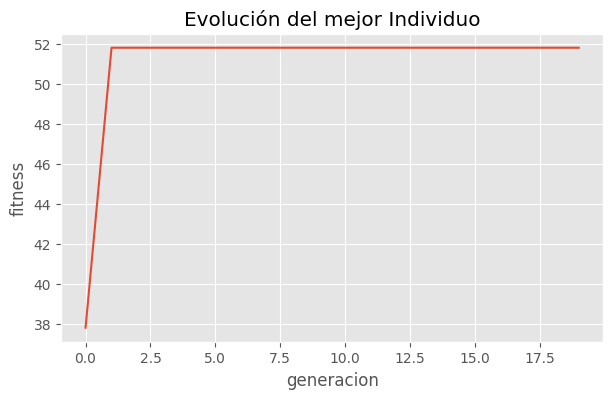

In [5]:
# Evolución de la optimización
from matplotlib import pyplot as plt


population = Population(50, tasks)
population.optimize(optimization_function, 'maximize', n_generations=20 , distribution="aleatoria", mutation_pob=10)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7, 4))
population.results_df.plot(x = "generation",
                             y = "best_fitness",
                             ax= ax)
ax.set(title='Evolución del mejor Individuo', xlabel='generacion', ylabel='fitness')
ax.legend().set_visible(False)